In [37]:
import numpy as np
import pandas as ps
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [53]:
class CTC(nn.Module):
  def __init__(self, input, hidden, out):
    super(CTC,self).__init__()
    self.rnn=nn.LSTM(input_size=input,hidden_size=hidden,num_layers=1,bidirectional=False, batch_first=True)
    self.fc=nn.Linear(hidden,out)
  def forward(self,x):
    output,_=self.rnn(x)
    output=self.fc(output)
    return output



In [54]:
input=13
hidden=128
out=10
model=CTC(input,hidden,out)
loss=nn.CTCLoss(blank=0)
opt=optim.AdamW(model.parameters(),lr=0.001)



In [55]:
batch_size = 2
seq_length = 15
example_input = torch.randn(batch_size, seq_length, input)
target_lengths = torch.tensor([5, 3])
targets = torch.tensor([[1, 2, 3, 4, 5], [1, 2, 3, 0, 0]])  # 0은 패딩 값
input_lengths = torch.full((batch_size,), seq_length, dtype=torch.long)



In [56]:
model.train()
opt.zero_grad()
logits = model(example_input)  # (batch_size, seq_length, output_dim)
log_probs = F.log_softmax(logits, dim=1)
loss = loss(log_probs.permute(1, 0, 2), targets, input_lengths, target_lengths)
loss.backward()
opt.step()

print(f"Loss: {loss.item()}")

Loss: 7.9830427169799805


In [57]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class LargeCTC(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers):
        super(LargeCTC, self).__init__()
        self.rnn = nn.LSTM(input_size=input_dim, hidden_size=hidden_dim, num_layers=num_layers, bidirectional=True, batch_first=True)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)  # 양방향이므로 hidden_dim의 2배 사용

    def forward(self, x):
        output, _ = self.rnn(x)
        output = self.fc(output)
        return output

# 모델 파라미터 설정
input_dim = 13   # 예: MFCC 특성의 차원 수
hidden_dim = 256 # 은닉 유닛 수 증가
output_dim = 10  # 출력 클래스 수 (0-9)
num_layers = 3   # 레이어 수 증가

# 모델 초기화
model = LargeCTC(input_dim, hidden_dim, output_dim, num_layers)
loss_fn = nn.CTCLoss(blank=0)
optimizer = optim.AdamW(model.parameters(), lr=0.001)

# 테스트 데이터 준비
batch_size = 2
seq_length = 15
example_input = torch.randn(batch_size, seq_length, input_dim)
target_lengths = torch.tensor([5, 3])
targets = torch.tensor([[1, 2, 3, 4, 5], [1, 2, 3, 0, 0]])  # 0은 패딩 값
input_lengths = torch.full((batch_size,), seq_length, dtype=torch.long)

# 모델 학습
model.train()
optimizer.zero_grad()
logits = model(example_input)  # (batch_size, seq_length, output_dim)
log_probs = F.log_softmax(logits, dim=2)
loss = loss_fn(log_probs.permute(1, 0, 2), targets, input_lengths, target_lengths)
loss.backward()
optimizer.step()

print(f"Loss: {loss.item()}")


Loss: 6.346864700317383


In [58]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class LargeCTC(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers):
        super(LargeCTC, self).__init__()
        self.rnn = nn.LSTM(input_size=input_dim, hidden_size=hidden_dim, num_layers=num_layers, bidirectional=True, batch_first=True)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)

    def forward(self, x):
        output, _ = self.rnn(x)
        output = self.fc(output)
        return output

# 모델 파라미터 설정
input_dim = 13
hidden_dim = 256
output_dim = 26  # 예를 들어 알파벳 문자를 출력
num_layers = 3

# 모델 초기화
model = LargeCTC(input_dim, hidden_dim, output_dim, num_layers)
loss_fn = nn.CTCLoss(blank=0)
optimizer = optim.AdamW(model.parameters(), lr=0.001)

# 더 큰 테스트 데이터 준비
batch_size = 10  # 더 큰 배치 사이즈
seq_length = 50  # 더 긴 시퀀스 길이
example_input = torch.randn(batch_size, seq_length, input_dim)
target_lengths = torch.randint(low=10, high=seq_length, size=(batch_size,))  # 무작위로 타겟 길이 설정
targets = torch.randint(1, output_dim, size=(batch_size, max(target_lengths)))  # 각 타겟 길이에 맞는 랜덤 타겟 생성
input_lengths = torch.full((batch_size,), seq_length, dtype=torch.long)

# 모델 학습
model.train()
optimizer.zero_grad()
logits = model(example_input)  # (batch_size, seq_length, output_dim)
log_probs = F.log_softmax(logits, dim=2)
loss = loss_fn(log_probs.permute(1, 0, 2), targets, input_lengths, target_lengths)
loss.backward()
optimizer.step()

print(f"Loss: {loss.item()}")


Loss: 7.211586952209473


In [59]:
# 테스트 데이터 준비
test_batch_size = 5
test_seq_length = 50
test_input = torch.randn(test_batch_size, test_seq_length, input_dim)
test_target_lengths = torch.randint(low=10, high=test_seq_length, size=(test_batch_size,))
test_targets = torch.randint(1, output_dim, size=(test_batch_size, max(test_target_lengths)))
test_input_lengths = torch.full((test_batch_size,), test_seq_length, dtype=torch.long)

# 모델 평가 모드 설정
model.eval()

# 그래디언트 계산 비활성화
with torch.no_grad():
    test_logits = model(test_input)
    test_log_probs = F.log_softmax(test_logits, dim=2)
    test_loss = loss_fn(test_log_probs.permute(1, 0, 2), test_targets, test_input_lengths, test_target_lengths)

print(f"Test Loss: {test_loss.item()}")


Test Loss: 5.55556058883667


In [72]:
import torchaudio
import torchaudio.transforms as transforms


In [73]:
mel_spectrogram=transforms.MelSpectrogram(
    sample_rate=16000,
    n_fft=4000,
    hop_length=160,
    n_mels=64
)

In [74]:
class AudioModel(nn.Module):
    def __init__(self):
        super(AudioModel, self).__init__()
        self.lstm = nn.LSTM(input_size=64, hidden_size=128, num_layers=1, batch_first=True)
        self.fc = nn.Linear(128, 10)

    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.fc(x[:, -1, :])  # 시퀀스의 마지막 출력만 사용
        return x


In [77]:
# 가상의 오디오 데이터 생성 (실제 사용 시 실제 오디오 데이터를 로드)
dummy_audio = torch.randn(1, 16000)  # 1초 길이의 더미 오디오

# 멜스펙트로그램 생성
mel_spec = mel_spectrogram(dummy_audio)
mel_spec = mel_spec.permute(0, 2, 1)


# 멜스펙트로그램을 모델 입력으로 사용
model = AudioModel()
output = model(mel_spec)  # 배치 차원 추가
print(output)


tensor([[ 0.1945, -0.0681, -0.1932,  0.2798,  0.2212,  0.6173, -0.3930,  0.3485,
          0.0703, -0.2821]], grad_fn=<AddmmBackward0>)


In [78]:
!pip install librosa matplotlib


In [79]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

Saving [FVOst.net]+Sister+S+-+Umarun+Taisou.mp3 to [FVOst.net]+Sister+S+-+Umarun+Taisou.mp3


In [81]:
audio_path = next(iter(uploaded))
audio_path

'[FVOst.net]+Sister+S+-+Umarun+Taisou.mp3'

In [82]:
y,sr=librosa.load(audio_path,sr=None)
d=librosa.stft(y)
s_db=librosa.amplitude_to_db(abs(d),ref=np.max)

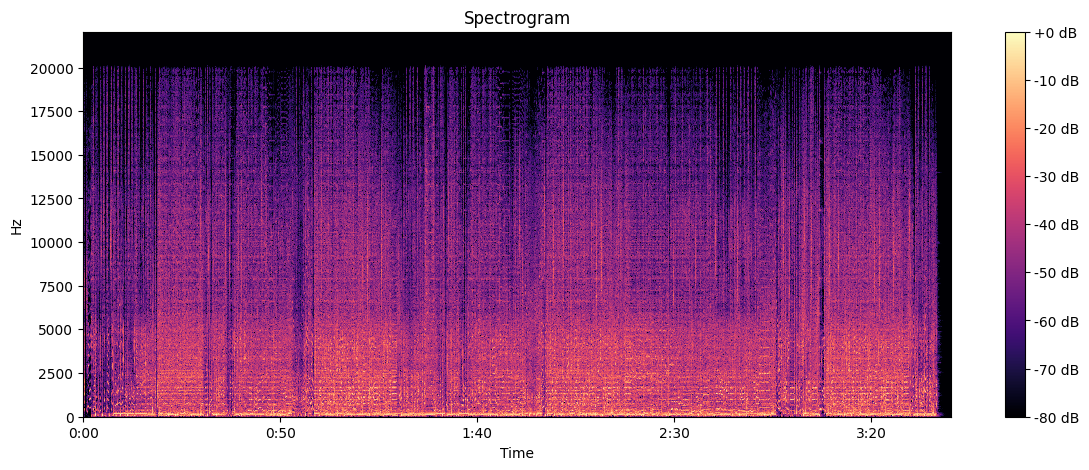

In [83]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(s_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

In [98]:
print(s_db)


[[-80. -80. -80. ... -80. -80. -80.]
 [-80. -80. -80. ... -80. -80. -80.]
 [-80. -80. -80. ... -80. -80. -80.]
 ...
 [-80. -80. -80. ... -80. -80. -80.]
 [-80. -80. -80. ... -80. -80. -80.]
 [-80. -80. -80. ... -80. -80. -80.]]


In [101]:
# 예를 들어, 첫 번째 채널의 처음 10개 시간 스텝, 모든 주파수 범위를 출력
print(s_db[:, :10])


[[-80. -80. -80. ... -80. -80. -80.]
 [-80. -80. -80. ... -80. -80. -80.]
 [-80. -80. -80. ... -80. -80. -80.]
 ...
 [-80. -80. -80. ... -80. -80. -80.]
 [-80. -80. -80. ... -80. -80. -80.]
 [-80. -80. -80. ... -80. -80. -80.]]


In [103]:
print(f"Maximum value in spectrogram: {s_db.max()}")
print(f"Minimum value in spectrogram: {s_db.min()}")
print(f"Mean value in spectrogram: {s_db.mean()}")


Maximum value in spectrogram: 0.0
Minimum value in spectrogram: -80.0
Mean value in spectrogram: -54.7947883605957


In [86]:
waveform,sample_rate=torchaudio.load(audio_path)
transform=torchaudio.transforms.Spectrogram()

spectrogram=transform(waveform)

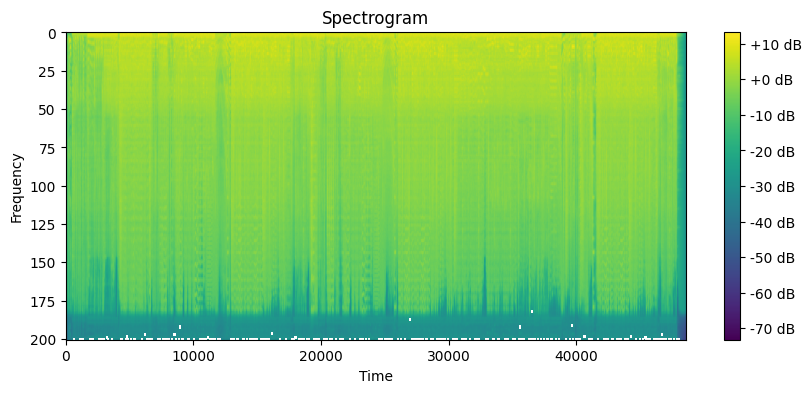

In [87]:
plt.figure(figsize=(10, 4))
plt.imshow(spectrogram.log2()[0,:,:].numpy(), cmap='viridis', aspect='auto')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

In [88]:
print(spectrogram)


tensor([[[1.0442e-13, 2.4599e-15, 4.1893e-13,  ..., 1.2741e-13,
          3.6648e-13, 1.0929e-16],
         [2.3483e-17, 1.2789e-13, 6.9256e-13,  ..., 1.4169e-14,
          3.9261e-13, 2.6639e-14],
         [1.0426e-13, 7.9108e-14, 6.2241e-13,  ..., 1.9437e-13,
          2.8868e-13, 1.7240e-16],
         ...,
         [8.2981e-14, 1.2104e-19, 3.0441e-21,  ..., 4.0959e-20,
          2.7531e-19, 5.6918e-16],
         [8.3007e-14, 1.2906e-19, 9.7770e-23,  ..., 1.5744e-20,
          2.3844e-19, 5.5926e-16],
         [8.3395e-14, 9.9600e-20, 9.1197e-23,  ..., 1.5982e-20,
          2.4249e-19, 5.5499e-16]],

        [[1.4663e-12, 3.0610e-13, 1.7835e-13,  ..., 1.8108e-13,
          3.4362e-13, 6.3706e-16],
         [7.7301e-13, 3.9714e-13, 1.2167e-13,  ..., 1.8738e-13,
          2.3273e-13, 2.1013e-14],
         [9.2186e-15, 3.3909e-14, 6.1201e-14,  ..., 1.6189e-13,
          2.4447e-13, 7.0549e-14],
         ...,
         [4.8883e-15, 1.5253e-21, 1.7121e-19,  ..., 1.7868e-21,
          1.723

In [89]:
# 예를 들어, 첫 번째 채널의 처음 10개 시간 스텝, 모든 주파수 범위를 출력
print(spectrogram[0, :, :10])


tensor([[1.0442e-13, 2.4599e-15, 4.1893e-13,  ..., 9.9173e-11, 1.4634e-10,
         9.3668e-11],
        [2.3483e-17, 1.2789e-13, 6.9256e-13,  ..., 1.1119e-10, 4.7765e-10,
         6.6647e-10],
        [1.0426e-13, 7.9108e-14, 6.2241e-13,  ..., 8.7642e-11, 1.9305e-10,
         7.0712e-10],
        ...,
        [8.2981e-14, 1.2104e-19, 3.0441e-21,  ..., 1.1678e-18, 1.6094e-18,
         5.2997e-18],
        [8.3007e-14, 1.2906e-19, 9.7770e-23,  ..., 6.7255e-19, 1.0953e-18,
         5.1526e-18],
        [8.3395e-14, 9.9600e-20, 9.1197e-23,  ..., 6.1677e-19, 1.0506e-18,
         5.1410e-18]])


In [90]:
print(f"Maximum value in spectrogram: {spectrogram.max()}")
print(f"Minimum value in spectrogram: {spectrogram.min()}")
print(f"Mean value in spectrogram: {spectrogram.mean()}")


Maximum value in spectrogram: 11421.2607421875
Minimum value in spectrogram: 0.0
Mean value in spectrogram: 14.360796928405762
